<a href="https://colab.research.google.com/github/MathewS424/PyTorch-Tutorial/blob/main/21_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Neural Network with PyTorch in 15 Minutes | Coding Challenge
[Tutorial](https://youtu.be/mozBidd58VQ?si=CEbo5NSPd94nA5W6)

In [27]:
# Import Dependencies
import torch
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Grayscale

In [3]:
# Get data
train = datasets.MNIST(root='/cnn_data', train=True, transform=ToTensor(), download=True)
dataset = DataLoader(train, batch_size=32, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4391150.47it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 56477.97it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 243160.99it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10473077.94it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



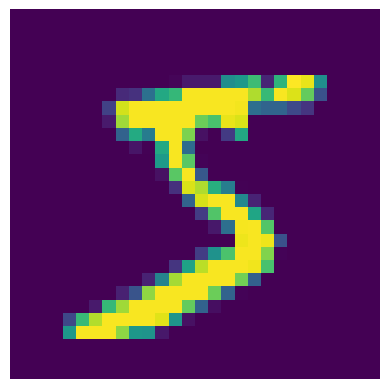

5

In [4]:
import matplotlib.pyplot as plt

image, label = train[0]
image_np = image.permute(1, 2, 0).cpu().numpy()
plt.imshow(image_np)
plt.axis('off')  # Turn off axis labels
plt.show()
label

In [9]:
# Image Classifier Neural Network
class ImageClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, 32, (3, 3)),
        nn.ReLU(),
        nn.Conv2d(32, 64, (3, 3)),
        nn.ReLU(),
        nn.Conv2d(64, 64, (3, 3)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(64*(28-6)*(28-6), 10) # 64 - output from Conv2d,28x28 pixel each Conv2d reduce pixel by 2 so 3 Conv2d so total 6 , 10 is no of classes(0,1,2...9)
    )

  def forward(self, x):
    return self.model(x)

In [12]:
# Instance of the neural network, loss, optimizer
clf = ImageClassifier().to('cuda')   # If no gpu then use .to('cpu')

criterion = nn.CrossEntropyLoss()
optimizer = Adam(clf.parameters(), lr=1e-3)

In [13]:
# Training Flow
if __name__ == '__main__':
  for epoch in range(10):
    for batch in dataset:
      X, y = batch
      X, y = X.to('cuda'), y.to('cuda')
      yhat = clf(X)
      loss = criterion(yhat, y)

      # Apply backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    print(f'Epoch: {epoch} loss is {loss.item()}')

  with open('model_state.pt', 'wb') as f:
    save(clf.state_dict(), f)

Epoch: 0 loss is 0.006023429334163666
Epoch: 1 loss is 0.023649288341403008
Epoch: 2 loss is 0.02388080768287182
Epoch: 3 loss is 0.0004396657459437847
Epoch: 4 loss is 0.0036853256169706583
Epoch: 5 loss is 4.697393251262838e-06
Epoch: 6 loss is 0.0007025611121207476
Epoch: 7 loss is 0.002043756889179349
Epoch: 8 loss is 0.02755664475262165
Epoch: 9 loss is 0.020496372133493423


In [15]:
with open('model_state.pt', 'rb') as f:
  clf.load_state_dict(load(f))

In [35]:
img = Image.open('sample_data/img_1.jpg')
img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

print(torch.argmax(clf(img_tensor)))

tensor(2, device='cuda:0')


In [42]:
img = Image.open('sample_data/img_2.jpg')
img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

print(torch.argmax(clf(img_tensor)).item())

0


9


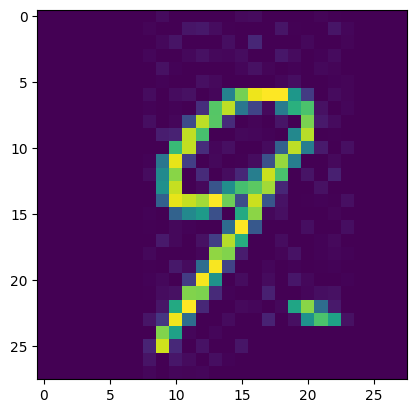

In [45]:
img = Image.open('sample_data/img_3.jpg')
img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

print(torch.argmax(clf(img_tensor)).item())

plt.imshow(img)
plt.show()
#

In [28]:
img = Image.open('sample_data/img_4.jpg')
img = Grayscale()(img)
img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

print(torch.argmax(clf(img_tensor)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x12241152 and 30976x10)

In [29]:
img = Image.open('sample_data/img_3.jpg')
img_tensor = ToTensor()(img)
print(img_tensor.shape)  # This will print the shape of the tensor

img = Image.open('sample_data/img_4.jpg')
img_tensor = ToTensor()(img)
print(img_tensor.shape)  # This will print the shape of the tensor


torch.Size([1, 28, 28])
torch.Size([3, 384, 512])


In [40]:
from PIL import Image,ImageOps
from torchvision.transforms import ToTensor, Grayscale, Resize, Compose

# Load the RGB image
img = Image.open('sample_data/img_4.jpg')
# Invert the colors
img_inverted = ImageOps.invert(img)

# Define the transformation: convert to grayscale and resize
transform = Compose([
    Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
    Resize((28, 28)),                  # Resize to 28x28 pixels
    ToTensor()                         # Convert to tensor
])

img_tensor_inverted = transform(img_inverted).unsqueeze(0).to('cuda')

# Print the size of the tensor to confirm the conversion
print(img_tensor_inverted.shape)  # Should output: torch.Size([1, 1, 28, 28])
print(torch.argmax(clf(img_tensor_inverted)))  # This should give a better prediction

torch.Size([1, 1, 28, 28])
tensor(1, device='cuda:0')


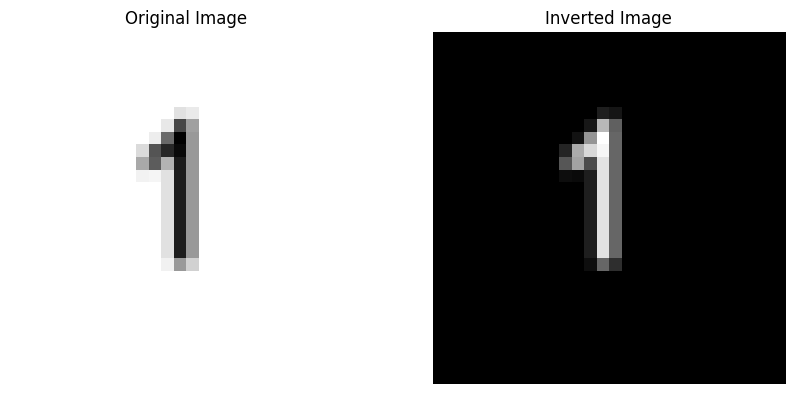

Original Image Tensor Shape: torch.Size([1, 1, 28, 28])
Inverted Image Tensor Shape: torch.Size([1, 1, 28, 28])
Prediction for Original Image: 4
Prediction for Inverted Image: 1


In [41]:
from PIL import Image, ImageOps
from torchvision.transforms import ToTensor, Grayscale, Resize, Compose, ToPILImage
import matplotlib.pyplot as plt
import torch

# Load the RGB image
img = Image.open('sample_data/img_4.jpg')

# Invert the colors
img_inverted = ImageOps.invert(img)

# Define the transformation: convert to grayscale and resize
transform = Compose([
    Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
    Resize((28, 28)),                  # Resize to 28x28 pixels
    ToTensor()                         # Convert to tensor
])

# Apply the transformation
img_tensor = transform(img).unsqueeze(0).to('cuda')
img_tensor_inverted = transform(img_inverted).unsqueeze(0).to('cuda')

# Convert tensors back to PIL Images for visualization
to_pil = ToPILImage()
img_pil = to_pil(img_tensor.squeeze(0).cpu())
img_pil_inverted = to_pil(img_tensor_inverted.squeeze(0).cpu())

# Display images and predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_pil, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Inverted Image")
plt.imshow(img_pil_inverted, cmap='gray')
plt.axis('off')

plt.show()

# Print the size of the tensor to confirm the conversion
print("Original Image Tensor Shape:", img_tensor.shape)  # Should output: torch.Size([1, 1, 28, 28])
print("Inverted Image Tensor Shape:", img_tensor_inverted.shape)  # Should output: torch.Size([1, 1, 28, 28])

# Make predictions
prediction_original = torch.argmax(clf(img_tensor))
prediction_inverted = torch.argmax(clf(img_tensor_inverted))

print("Prediction for Original Image:", prediction_original.item())
print("Prediction for Inverted Image:", prediction_inverted.item())
